In [40]:
import pandas as pd

In [42]:
eco = pd.read_csv("economy.csv")

In [43]:
busi = pd.read_csv("business.csv")

In [44]:
main = pd.read_csv("Clean_Dataset.csv")

In [46]:
#FEATURES
#The various features of the cleaned dataset are explained below:
#1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
#2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
#3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
#4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
#5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
#6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
#7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
#8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
#9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
#10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
#11) Price: Target variable stores information of the ticket price.

In [48]:
main

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [52]:
main.flight.unique()

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], dtype=object)

In [54]:
main[main.flight == 'SG-8709']

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
274,274,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,3,6060
398,398,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,4,5953
564,564,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,5,5953
739,739,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,6,5953
...,...,...,...,...,...,...,...,...,...,...,...,...
42049,42049,SpiceJet,SG-8709,Delhi,Evening,one,Early_Morning,Chennai,Economy,13.08,43,4942
42053,42053,SpiceJet,SG-8709,Delhi,Evening,one,Night,Chennai,Economy,26.42,43,4942
42228,42228,SpiceJet,SG-8709,Delhi,Evening,one,Night,Chennai,Economy,26.83,44,4942
42381,42381,SpiceJet,SG-8709,Delhi,Evening,one,Night,Chennai,Economy,27.00,45,4942


In [56]:
main.source_city.unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [58]:
main.destination_city.unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [60]:
main.departure_time.unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [62]:
main.stops.unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [64]:
main.arrival_time.unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [66]:
main['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [68]:
main.duration.unique()

array([ 2.17,  2.33,  2.25,  2.08, 12.25, 16.33, 11.75, 14.5 , 15.67,
        3.75,  2.5 ,  5.83,  8.  ,  6.  , 14.67, 16.17, 18.  , 23.17,
       24.17,  8.83,  4.5 , 15.25, 11.  , 19.08, 22.83, 26.42, 17.75,
       19.58, 26.67, 15.17, 20.83, 11.42, 22.25, 26.  , 21.75,  3.83,
        4.42,  7.67,  8.33, 10.42, 23.75, 19.5 ,  6.5 , 12.42, 21.08,
       28.17, 28.25,  9.25, 17.92,  7.08, 13.83,  7.58, 15.83, 24.42,
        4.17,  4.25,  5.08, 29.33, 17.  , 27.17, 24.75,  5.75, 12.75,
       13.75, 17.83,  5.5 , 23.83,  5.  , 26.5 , 12.83,  8.92, 11.17,
       12.17, 15.58, 15.75,  7.92, 13.25, 16.  , 22.75,  6.33,  7.25,
       30.08, 18.25,  6.08,  2.  , 12.33,  3.5 , 10.25, 14.17, 25.58,
        4.08,  9.75,  6.67,  9.67, 10.08, 12.58,  7.  ,  8.25, 15.5 ,
       10.17, 23.5 , 25.75, 11.5 , 21.42, 14.25,  7.75,  5.33,  5.67,
        4.75, 19.33,  6.25, 10.33,  9.08, 15.42,  4.83, 25.83,  7.5 ,
       27.58, 28.42,  6.42, 24.58, 16.5 , 11.33, 24.83, 14.92, 26.08,
        5.42, 28.5 ,

In [70]:
#airline,source_city,departure_time,stops,arrival_time,destination_city,['class'],duration,price

In [72]:
main = main.drop(['Unnamed: 0','flight','days_left'],axis = 1)

In [74]:
main

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,5955
...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,81585


In [76]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   price             300153 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 20.6+ MB


In [78]:
main.describe()

,duration,price
count,300153.000000,300153.000000
mean,12.221021,20889.660523
std,7.191997,22697.767366
min,0.830000,1105.000000
25%,6.830000,4783.000000
50%,11.250000,7425.000000
75%,16.170000,42521.000000
max,49.830000,123071.000000


In [80]:
main.isna().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
price               0
dtype: int64

In [82]:
main.duplicated().sum()

231412

In [83]:
main.shape

(300153, 9)

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

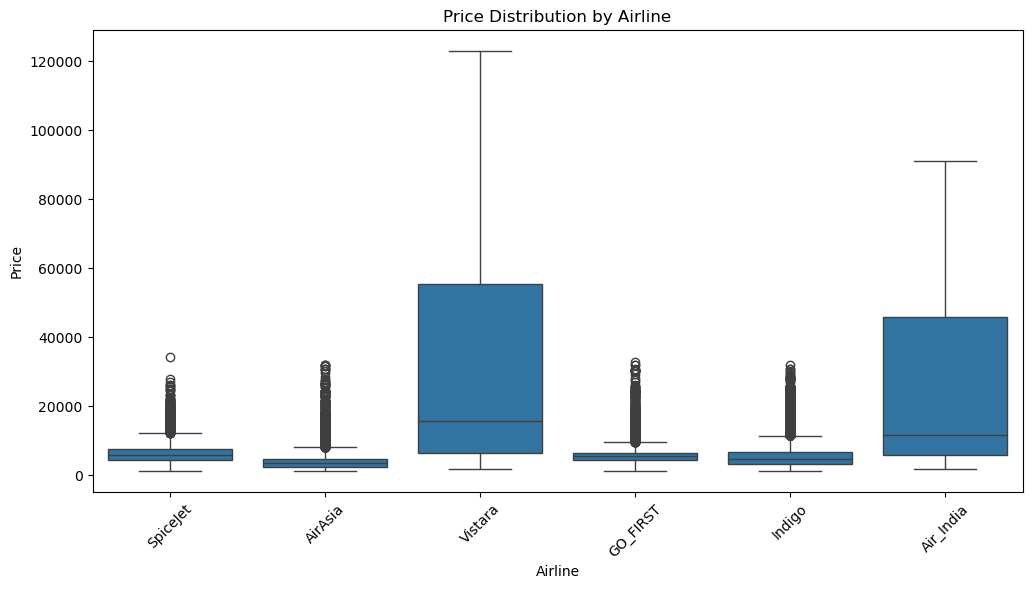

In [25]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='airline', y='price', data=main)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Price Distribution by Airline')
plt.xticks(rotation=45)
plt.show()


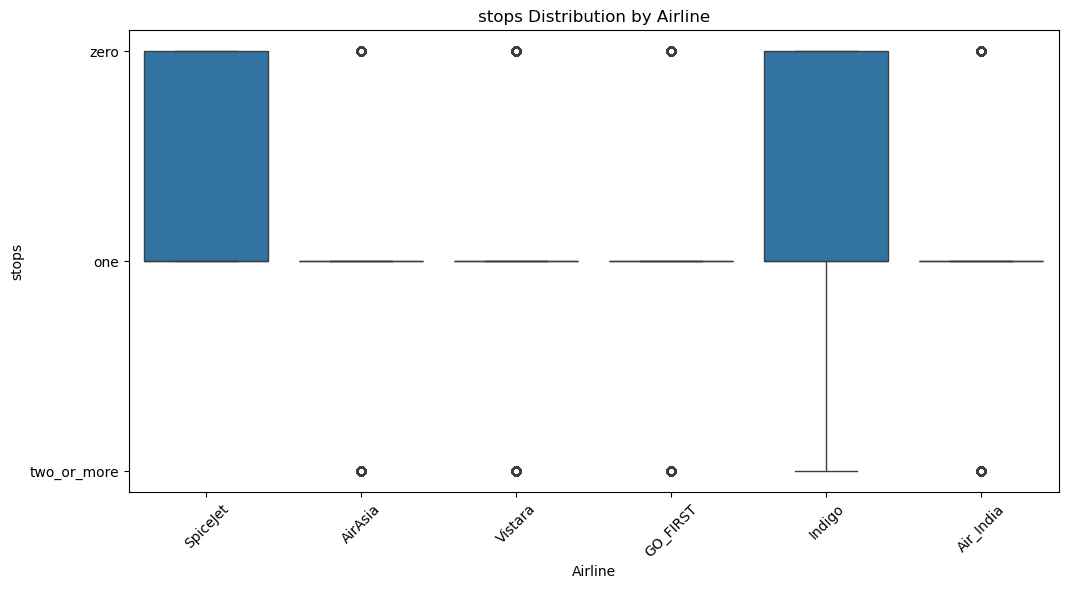

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='airline', y='stops', data=main)
plt.xlabel('Airline')
plt.ylabel('stops')
plt.title('stops Distribution by Airline')
plt.xticks(rotation=45)
plt.show()

In [88]:
main.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,5955


In [90]:
main.airline.unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

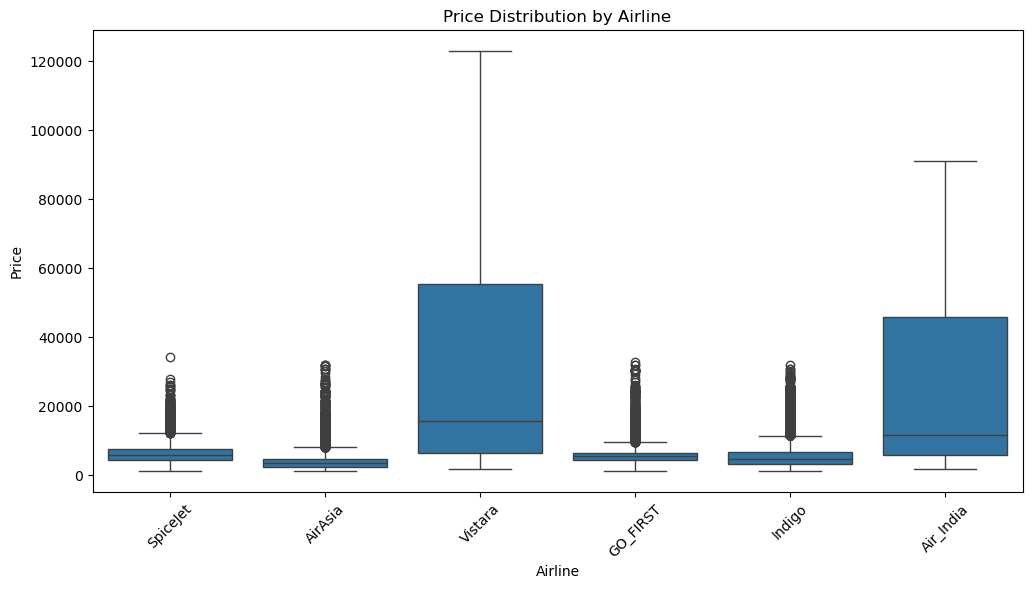

In [29]:

main['airline'] = main['airline'].astype('category')

# Boxplot for price distribution by airline
plt.figure(figsize=(12, 6))
sns.boxplot(x='airline', y='price', data=main, order=['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo', 'Air_India'])
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Price Distribution by Airline')
plt.xticks(rotation=45)
plt.show()


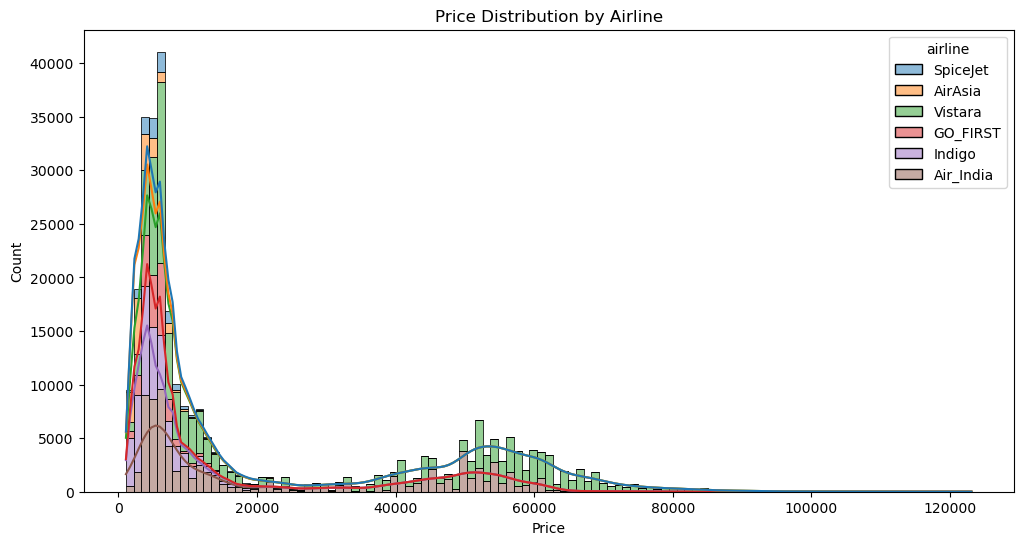

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(data=main, x='price', hue='airline', kde=True, multiple="stack", hue_order=['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo', 'Air_India'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution by Airline')
plt.show()


In [31]:
#Airline to Number Mapping: {'AirAsia': 1, 'Air_India': 2, 'GO_FIRST': 3, 'Indigo': 4, 'SpiceJet': 5, 'Vistara': 6}

In [92]:
airline_mapping = {'AirAsia': 1, 'Air_India': 2, 'GO_FIRST': 3, 'Indigo': 4, 'SpiceJet': 5, 'Vistara': 6}

main['airline'] = main['airline'].map(airline_mapping)


In [94]:
main

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,price
0,5,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,5953
1,5,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,5953
2,1,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,5956
3,6,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,5955
4,6,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,5955
...,...,...,...,...,...,...,...,...,...
300148,6,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,69265
300149,6,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,77105
300150,6,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,79099
300151,6,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,81585


In [96]:
main.source_city.unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [98]:
city_mapping = {'Delhi': 1, 'Mumbai': 2, 'Bangalore': 3, 'Kolkata': 4, 'Hyderabad': 5, 'Chennai': 6}

main['source_city'] = main['source_city'].map(city_mapping)


In [100]:
main

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,price
0,5,1,Evening,zero,Night,Mumbai,Economy,2.17,5953
1,5,1,Early_Morning,zero,Morning,Mumbai,Economy,2.33,5953
2,1,1,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,5956
3,6,1,Morning,zero,Afternoon,Mumbai,Economy,2.25,5955
4,6,1,Morning,zero,Morning,Mumbai,Economy,2.33,5955
...,...,...,...,...,...,...,...,...,...
300148,6,6,Morning,one,Evening,Hyderabad,Business,10.08,69265
300149,6,6,Afternoon,one,Night,Hyderabad,Business,10.42,77105
300150,6,6,Early_Morning,one,Night,Hyderabad,Business,13.83,79099
300151,6,6,Early_Morning,one,Evening,Hyderabad,Business,10.00,81585


In [102]:
main.departure_time.unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [104]:
time_mapping = {'Early_Morning': 1,'Morning': 2 , 'Afternoon': 3,'Evening': 4, 'Night': 5, 'Late_Night': 6}
main['departure_time'] = main['departure_time'].map(time_mapping)

In [106]:
main

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,price
0,5,1,4,zero,Night,Mumbai,Economy,2.17,5953
1,5,1,1,zero,Morning,Mumbai,Economy,2.33,5953
2,1,1,1,zero,Early_Morning,Mumbai,Economy,2.17,5956
3,6,1,2,zero,Afternoon,Mumbai,Economy,2.25,5955
4,6,1,2,zero,Morning,Mumbai,Economy,2.33,5955
...,...,...,...,...,...,...,...,...,...
300148,6,6,2,one,Evening,Hyderabad,Business,10.08,69265
300149,6,6,3,one,Night,Hyderabad,Business,10.42,77105
300150,6,6,1,one,Night,Hyderabad,Business,13.83,79099
300151,6,6,1,one,Evening,Hyderabad,Business,10.00,81585


In [108]:
main.stops.unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [110]:
stop_mapping = {'zero': 0, 'one': 1, 'two_or_more': 3}
main['stops'] = main['stops'].map(stop_mapping)

In [112]:
main

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,price
0,5,1,4,0,Night,Mumbai,Economy,2.17,5953
1,5,1,1,0,Morning,Mumbai,Economy,2.33,5953
2,1,1,1,0,Early_Morning,Mumbai,Economy,2.17,5956
3,6,1,2,0,Afternoon,Mumbai,Economy,2.25,5955
4,6,1,2,0,Morning,Mumbai,Economy,2.33,5955
...,...,...,...,...,...,...,...,...,...
300148,6,6,2,1,Evening,Hyderabad,Business,10.08,69265
300149,6,6,3,1,Night,Hyderabad,Business,10.42,77105
300150,6,6,1,1,Night,Hyderabad,Business,13.83,79099
300151,6,6,1,1,Evening,Hyderabad,Business,10.00,81585


In [114]:
main.shape

(300153, 9)

In [116]:
main.arrival_time.unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [118]:
arrival_mapping = {'Early_Morning': 1,'Morning': 2 , 'Afternoon': 3,'Evening': 4, 'Night': 5, 'Late_Night': 6}
main['arrival_time'] = main['arrival_time'].map(arrival_mapping)

In [120]:
main.destination_city.unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [122]:
dest_mapping = {'Delhi': 1, 'Mumbai': 2, 'Bangalore': 3, 'Kolkata': 4, 'Hyderabad': 5, 'Chennai': 6}

main['destination_city'] = main['destination_city'].map(dest_mapping)

In [124]:
main['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [126]:
class_mapping = {'Economy': 1,'Business': 2}
main['class'] = main['class'].map(class_mapping)

In [128]:
main

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,price
0,5,1,4,0,5,2,1,2.17,5953
1,5,1,1,0,2,2,1,2.33,5953
2,1,1,1,0,1,2,1,2.17,5956
3,6,1,2,0,3,2,1,2.25,5955
4,6,1,2,0,2,2,1,2.33,5955
...,...,...,...,...,...,...,...,...,...
300148,6,6,2,1,4,5,2,10.08,69265
300149,6,6,3,1,5,5,2,10.42,77105
300150,6,6,1,1,5,5,2,13.83,79099
300151,6,6,1,1,4,5,2,10.00,81585


In [133]:
main

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,price
0,5,1,4,0,5,2,1,2.17,5953
1,5,1,1,0,2,2,1,2.33,5953
2,1,1,1,0,1,2,1,2.17,5956
3,6,1,2,0,3,2,1,2.25,5955
4,6,1,2,0,2,2,1,2.33,5955
...,...,...,...,...,...,...,...,...,...
300148,6,6,2,1,4,5,2,10.08,69265
300149,6,6,3,1,5,5,2,10.42,77105
300150,6,6,1,1,5,5,2,13.83,79099
300151,6,6,1,1,4,5,2,10.00,81585


In [135]:
main.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,4.104873,3.201487,2.867814,0.968576,3.699087,3.274104,1.311464,12.221021,20889.660523
std,1.833265,1.684757,1.416183,0.544079,1.351441,1.682563,0.463093,7.191997,22697.767366
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.830000,1105.000000
25%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,6.830000,4783.000000
50%,4.000000,3.000000,3.000000,1.000000,4.000000,3.000000,1.000000,11.250000,7425.000000
75%,6.000000,5.000000,4.000000,1.000000,5.000000,5.000000,2.000000,16.170000,42521.000000
max,6.000000,6.000000,6.000000,3.000000,6.000000,6.000000,2.000000,49.830000,123071.000000


In [137]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   source_city       300153 non-null  int64  
 2   departure_time    300153 non-null  int64  
 3   stops             300153 non-null  int64  
 4   arrival_time      300153 non-null  int64  
 5   destination_city  300153 non-null  int64  
 6   class             300153 non-null  int64  
 7   duration          300153 non-null  float64
 8   price             300153 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 20.6 MB


In [143]:
X = main.drop('price', axis=1)
Y = main['price']

In [147]:
X

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration
0,5,1,4,0,5,2,1,2.17
1,5,1,1,0,2,2,1,2.33
2,1,1,1,0,1,2,1,2.17
3,6,1,2,0,3,2,1,2.25
4,6,1,2,0,2,2,1,2.33
...,...,...,...,...,...,...,...,...
300148,6,6,2,1,4,5,2,10.08
300149,6,6,3,1,5,5,2,10.42
300150,6,6,1,1,5,5,2,13.83
300151,6,6,1,1,4,5,2,10.00


In [149]:
Y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [151]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 52)

In [153]:
x_train.shape

(225114, 8)

In [155]:
x_test.shape

(75039, 8)

In [157]:
y_train.shape

(225114,)

In [161]:
y_test.shape

(75039,)

In [178]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error


model1 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)

model1.fit(x_train, y_train)

# Make predictions
y_pred = model1.predict(x_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 4188.079050740413
MAE: 2772.7925718063457


C:\Users\sunnr\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [179]:
model1.score(x_test,y_test)

0.9658814711472196

In [182]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(x_train, y_train)
model.score(x_test, y_test)